In [18]:
import tensorflow as tf

for gpu in tf.config.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np




In [4]:

dataset = pd.read_csv('../datasets/sentiment.csv')

In [23]:
sentences = dataset['text'].to_list()
labels = dataset['sentiment'].to_list()

cutoff = int(len(sentences)*0.8)

In [35]:
train_sents = sentences[:cutoff]
test_sents = sentences[cutoff:]
train_labes = np.array(labels[:cutoff])
test_labes = np.array(labels[cutoff:])

vocab_size = 4000
embedding_dim = 16
max_length=50

tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

train_sents = tokenizer.texts_to_sequences(train_sents)
train_sents_padded = pad_sequences(train_sents,maxlen=max_length,padding='post',truncating='post')
test_sents = tokenizer.texts_to_sequences(test_sents)
test_sents_padded = pad_sequences(test_sents,maxlen=max_length,padding='post',truncating='post')

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            64000     
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [38]:
num_epochs = 100
history = model.fit(train_sents_padded,train_labes,epochs=num_epochs,validation_data=(test_sents_padded,test_labes))

Epoch 1/100
50/50 [==============================] - 2s 10ms/step - loss: 0.6887 - accuracy: 0.5348 - val_loss: 0.6941 - val_accuracy: 0.4286
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6722 - accuracy: 0.5825 - val_loss: 0.6861 - val_accuracy: 0.4887
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6494 - accuracy: 0.7163 - val_loss: 0.6731 - val_accuracy: 0.5514
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6183 - accuracy: 0.8010 - val_loss: 0.6539 - val_accuracy: 0.6466
Epoch 5/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5783 - accuracy: 0.8581 - val_loss: 0.6276 - val_accuracy: 0.6992
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.5319 - accuracy: 0.8958 - val_loss: 0.6007 - val_accuracy: 0.7143
Epoch 7/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.9240 - val_loss: 0.5705 - val_accuracy: 0.7243
Epoch 8/100


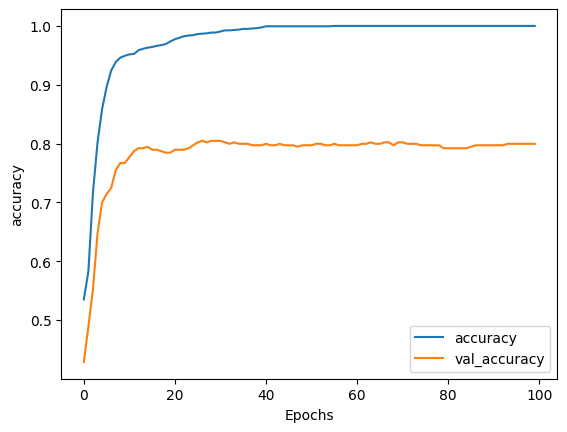

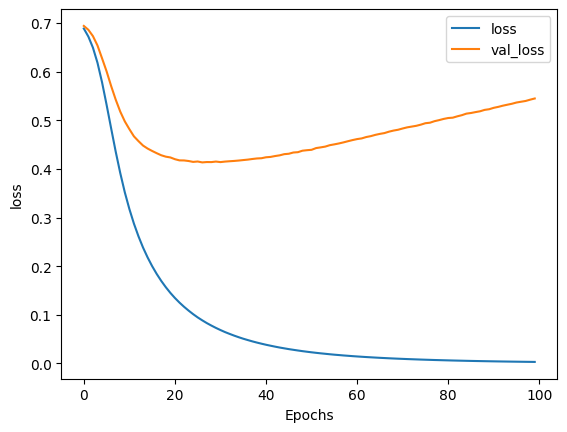

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [41]:
def fit_model_and_show_results (model, reviews):
    model.summary()
    history = model.fit(training_padded, training_labels_final, epochs=num_epochs,
                        validation_data=(validation_padded, validation_labels_final))
    plot_graphs(history, "accuracy")
    plot_graphs(history, "loss")
    predict_review(model, reviews)

In [43]:
num_epochs = 30

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Default learning rate for the Adam optimizer is 0.001
# Let's slow down the learning rate by 10.
learning_rate = 0.0001
model_cnn.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=['accuracy'])

In [47]:
num_epochs = 100
history = model_cnn.fit(train_sents_padded,train_labes,epochs=num_epochs,validation_data=(test_sents_padded,test_labes))

Epoch 1/100
50/50 [==============================] - 5s 12ms/step - loss: 0.6946 - accuracy: 0.4758 - val_loss: 0.6885 - val_accuracy: 0.5764
Epoch 2/100
50/50 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5085 - val_loss: 0.6891 - val_accuracy: 0.5689
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5581 - val_loss: 0.6896 - val_accuracy: 0.5915
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.6372 - val_loss: 0.6901 - val_accuracy: 0.5789
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6839 - accuracy: 0.6855 - val_loss: 0.6900 - val_accuracy: 0.5865
Epoch 6/100
50/50 [==============================] - 0s 5ms/step - loss: 0.6815 - accuracy: 0.7326 - val_loss: 0.6898 - val_accuracy: 0.5965
Epoch 7/100
50/50 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.7589 - val_loss: 0.6894 - val_accuracy: 0.5865
Epoch 8/100


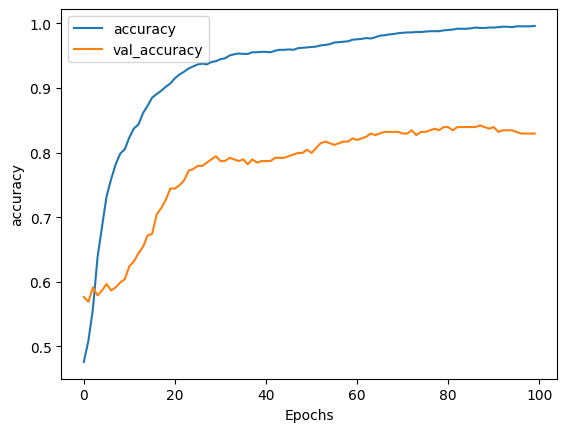

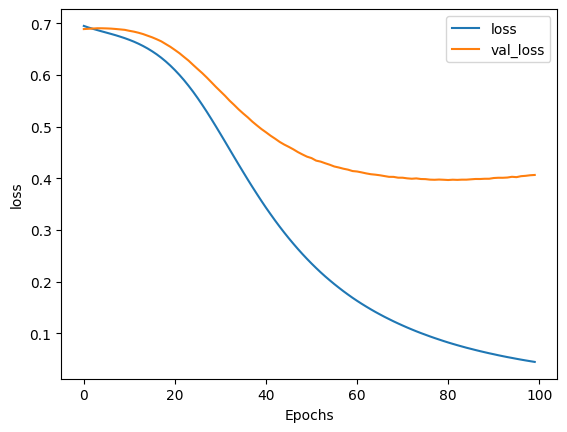

In [48]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [49]:
num_epochs = 30

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.00003 # slower than the default learning rate
model_gru.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate),
                  metrics=['accuracy'])



In [50]:
num_epochs = 100
history = model_gru.fit(train_sents_padded,train_labes,epochs=num_epochs,validation_data=(test_sents_padded,test_labes))

Epoch 1/100
50/50 [==============================] - 4s 22ms/step - loss: 0.6936 - accuracy: 0.4840 - val_loss: 0.6933 - val_accuracy: 0.4662
Epoch 2/100
50/50 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6942 - val_accuracy: 0.4486
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6928 - accuracy: 0.5135 - val_loss: 0.6946 - val_accuracy: 0.4386
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 0.6925 - accuracy: 0.5204 - val_loss: 0.6953 - val_accuracy: 0.4160
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5210 - val_loss: 0.6957 - val_accuracy: 0.4135
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.5210 - val_loss: 0.6962 - val_accuracy: 0.4110
Epoch 7/100
50/50 [==============================] - 0s 9ms/step - loss: 0.6915 - accuracy: 0.5223 - val_loss: 0.6967 - val_accuracy: 0.4110
Epoch 8/100


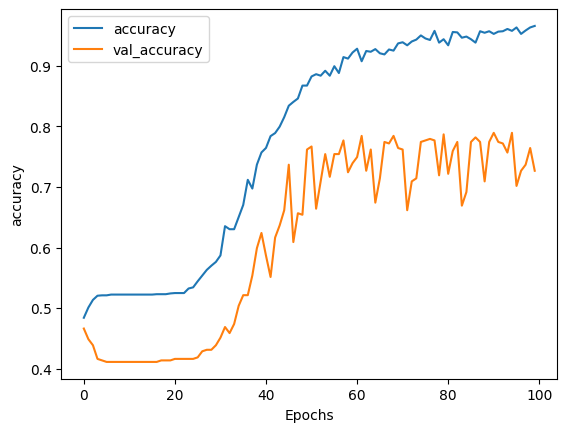

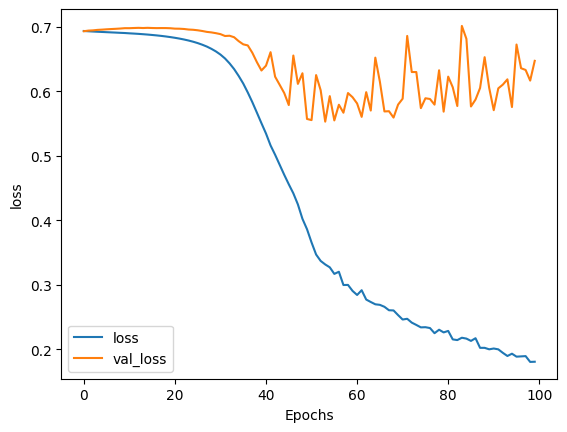

In [51]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")